In [29]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import natsort
from openpyxl import load_workbook
import random
from random import randrange
from sklearn.metrics import confusion_matrix, cohen_kappa_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras

from keras import models
from keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

LOAD DESIRED MODEL

In [30]:
#load certain model
model = load_model('./for_old22/reverse_MFCC_Dense_Classifier_l-3_u-512_e-1000_1588062326.h5')
# plot_model(model, to_file='reverse_MFCC_Dense_Classifier_model.png', show_shapes=True,show_layer_names=True)

LOAD TEST DATA

In [31]:
#read test dataset from csv
# librispeech
data5_unseen_10 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_unseen_10ms_R.csv')
data5_unseen_50 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_unseen_50ms_R.csv')
data5_unseen_100 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_unseen_100ms_R.csv')
data5_unseen_500 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_unseen_500ms_R.csv')
data5_unseen_1000 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data5_unseen_1000ms_R.csv')

# musan
#music
data6_unseen_10 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_unseen_10ms_R.csv')
data6_unseen_50 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_unseen_50ms_R.csv')
data6_unseen_100 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_unseen_100ms_R.csv')
data6_unseen_500 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_unseen_500ms_R.csv')
data6_unseen_1000 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data6_unseen_1000ms_R.csv')
#speech
data7_10 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data7_unseen_10ms_R.csv')
data7_50 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data7_unseen_50ms_R.csv')
data7_100 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data7_unseen_100ms_R.csv')
data7_500 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data7_unseen_500ms_R.csv')
data7_1000 = pd.read_csv('D:/Users/MC/Documents/UNI/MASTER/thesis/MFCC_FEATURES2/reverse_Mel_scale/data7_unseen_1000ms_R.csv')

GET TOTAL NUMBER OF FILES PER TYPE <br>
i.e. get number of entries per dataset (5,6) OR number of entries per IR-length (10,50,100,500,1000)

In [32]:
investigate_differencess_between_datasets = 1
# else investigate between IR lenght

In [33]:
#aggregate all data
if investigate_differencess_between_datasets:
    L5 = len(data5_unseen_10) + len(data5_unseen_50) + len(data5_unseen_100) + len(data5_unseen_500) + len(data5_unseen_1000)
    L6 = len(data6_unseen_10) + len(data6_unseen_50) + len(data6_unseen_100) + len(data6_unseen_500) + len(data6_unseen_1000)
    L7 = len(data7_10)        + len(data7_50)        + len(data7_100)        + len(data7_500)        + len(data7_1000)
    print(f'number of music samples: {L6}')
    print(f'number of speech samples: {L5+L7} \tof which {L5} are from Librispeech and {L7} are from Musan')
    data = pd.concat([data5_unseen_10, data5_unseen_50, data5_unseen_100, data5_unseen_500, data5_unseen_1000, data6_unseen_10, data6_unseen_50, data6_unseen_100, data6_unseen_500, data6_unseen_1000, data7_10, data7_50, data7_100, data7_500, data7_1000])

else:
    L_10 = len(data5_unseen_10) + len(data6_unseen_10) + len(data7_10)
    L_50 = len(data5_unseen_50) + len(data6_unseen_50) + len(data7_50)
    L_100 = len(data5_unseen_100) + len(data6_unseen_100) + len(data7_100)
    L_500 = len(data5_unseen_500) + len(data6_unseen_500) + len(data7_500)
    L_1000 = len(data5_unseen_1000) + len(data6_unseen_1000) + len(data7_1000)

    print(f'number of IR_10ms samples: {L_10}')
    print(f'number of IR_50ms samples: {L_50}')
    print(f'number of IR_100ms samples: {L_100}')
    print(f'number of IR_500ms samples: {L_500}')
    print(f'number of IR_1000ms samples: {L_1000}')
    data = pd.concat([data5_unseen_10, data6_unseen_10, data7_10, data5_unseen_50, data6_unseen_50, data7_50, data5_unseen_100, data6_unseen_100, data7_100, data5_unseen_500, data6_unseen_500, data7_500, data5_unseen_1000, data6_unseen_1000, data7_1000])

print()
print(f'number of rows: {data.shape[0]}')
#randomly display some of the data
print('random selection of rows:')
data_subset = data.sample(n=5)
data_subset.head()

number of music samples: 15800
number of speech samples: 16000 	of which 10000 are from Librispeech and 6000 are from Musan

number of rows: 31800
random selection of rows:


,filename,mfccM0,mfccV0,mfccM1,mfccV1,mfccM2,mfccV2,mfccM3,mfccV3,mfccM4,...,deltaDeltaV35,deltaDeltaM36,deltaDeltaV36,deltaDeltaM37,deltaDeltaV37,deltaDeltaM38,deltaDeltaV38,deltaDeltaM39,deltaDeltaV39,label
220,36_h_50_476-133471-0048.wav,-439.808258,231.086746,50.558193,226.770233,40.577339,77.302193,34.178974,76.500946,29.329950,...,0.015282,-0.000056,0.013118,-0.000068,0.011586,-0.000064,0.010223,-0.000039,0.007690,36
146,18_h_50_8699-291107-0095.wav,-462.335327,472.326263,44.689068,523.748901,33.459267,231.971039,28.815577,188.207794,26.480211,...,0.024386,-0.001597,0.016534,-0.000012,0.011256,0.000744,0.013177,-0.000370,0.010412,18
1208,216_h_1000_2004-147173-0023.wav,-432.904449,66.656929,48.778324,117.707893,45.101616,86.573250,39.996716,57.828552,34.274216,...,0.005355,0.001608,0.004708,0.001396,0.003190,0.001027,0.003315,0.000544,0.001832,216
3109,351_h_500_music-jamendo-0001.wav,-457.332306,94.168015,35.230507,74.071175,23.375227,8.659282,16.656324,11.242421,16.889578,...,0.004165,0.000410,0.004619,0.000868,0.002652,0.000527,0.003475,-0.000107,0.002871,351
25,0_h_500_6167-73972-0022.wav,-440.263519,242.133987,38.938496,305.590485,32.121376,157.171265,27.486866,114.332481,25.438484,...,0.018788,0.000585,0.013039,0.000272,0.007907,-0.000045,0.010672,0.000058,0.006834,0


PREPARING DATA

In [ ]:
#dropping unneccesary columns and storing filenames elsewhere
fileNames = data['filename']
data = data.drop(['filename'],axis=1)

In [ ]:
# function to reduce label resolution from every 9° to 4 quadrants
def reduce_Resolution(old_data):
    new_data = old_data.iloc[:, -1]
    new_label_list = pd.DataFrame(new_data)
    for i in range(len(new_data)):
        if 0 <= new_data.iloc[i] < 90:
            new_label_list.iloc[i] = 0
        if 90 <= new_data.iloc[i] < 180:
            new_label_list.iloc[i] = 1
        if 180 <= new_data.iloc[i] < 270:
            new_label_list.iloc[i] = 2
        if 270 <= new_data.iloc[i] < 360:
            new_label_list.iloc[i] = 3
    return new_label_list

In [ ]:
#making labels
labels_list = data.iloc[:, -1]
# labels_list = reduce_Resolution(data)
encoder = LabelEncoder()
y = encoder.fit_transform(labels_list)
print(f'labels are: {y}')

In [ ]:
# normalizing
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

MAKE PREDICTIONS AND EVALUATE

In [ ]:
#make prediction for each sample in X and evaluate entire model to get an idea of accuracy
predictions = model.predict(X)
final_predictions = np.argmax(predictions,axis=1)
test_loss, test_acc = model.evaluate(X,y)

COMPUTE SOME GENERAL STATISTICS

In [ ]:
#method to get difference between elements on circular scale
def absolute_diff(int1,int2):
    m_min = min(int1,int2)
    m_max = max(int1,int2)
    diff1 = m_max-m_min
    diff2 = m_min + 40 - m_max
    return diff1 if diff1 <=20 else diff2

In [61]:
##COMPUTE STATISTICS
labels = y
predictions = predictions
#check which errors occur
occuring_errors = np.zeros(21)
#check which direction are misclassified most often
hardest_to_predict = np.zeros(40)
#check what type of files make misclassification
indexes_of_misclassifications = []
misclassifications = []
#check what type of files make the worst misclassifications
indexes_of_grave_misclassifications = []
grave_misclassifications = []
#check which datasets produces what type of errors
all_errors_5 = np.zeros(21)
all_errors_6 = np.zeros(21)
all_errors_7 = np.zeros(21)
all_errors_10 = np.zeros(21)
all_errors_50 = np.zeros(21)
all_errors_100 = np.zeros(21)
all_errors_500 = np.zeros(21)
all_errors_1000 = np.zeros(21)
#correct direction
all_correct = np.zeros(40)
sum_correct = 0
for i in range(final_predictions.shape[0]):
    label = labels[i]
    predicted = final_predictions[i]
    error = absolute_diff(predicted,label)
    occuring_errors[error] = occuring_errors[error] + 1
    if error != 0:
        hardest_to_predict[label] += 1 
        indexes_of_misclassifications.append(i)
        misclassifications.append(fileNames.iloc[i])
    else :
        all_correct[label] += 1
        sum_correct += 1
    if error > 5:
        indexes_of_grave_misclassifications.append(i)
        grave_misclassifications.append(fileNames.iloc[i])
    if investigate_differencess_between_datasets:
        if 0 <= i < L5:
            all_errors_5[error] +=  1
        elif L5 <= i < L5 + L6:
            all_errors_6[error] +=  1
        elif L5 + L6 <= i < L5 + L6 + L7:
            all_errors_7[error] +=  1
    else:
        if 0 <= i < L_10:
            all_errors_10[error] +=  1
        elif L_10 <= i < L_10 + L_50:
            all_errors_50[error] +=  1
        elif L_10 + L_50 <= i < L_10 + L_50 + L_100:
            all_errors_100[error] +=  1
        elif L_10 + L_50 + L_100 <= i < L_10 + L_50 + L_100 + L_500:
            all_errors_500[error] +=  1
        elif L_10 + L_50 + L_100 + L_500 <= i < L_10 + L_50 + L_100 + L_500 + L_1000:
            all_errors_1000[error] +=  1
        
avg_occuring_errors = occuring_errors/(labels.shape[0])
# avg_hardest_to_predict = hardest_to_predict/(labels.shape[0])   
avg_hardest_to_predict = hardest_to_predict/(labels.shape[0]-sum_correct) 
if investigate_differencess_between_datasets:
    avg_errors_5 = all_errors_5/L5
    avg_errors_6 = all_errors_6/L6
    avg_errors_7 = all_errors_7/L7
    AVG_errors_5 = all_errors_5/(labels.shape[0])
    AVG_errors_6 = all_errors_6/(labels.shape[0])
    AVG_errors_7 = all_errors_7/(labels.shape[0])
else :
    avg_errors_10 = all_errors_10/L_10
    avg_errors_50 = all_errors_50/L_50
    avg_errors_100 = all_errors_100/L_100
    avg_errors_500 = all_errors_500/L_500
    avg_errors_1000 = all_errors_1000/L_1000
    AVG_errors_10 = all_errors_10/(labels.shape[0])
    AVG_errors_50 = all_errors_50/(labels.shape[0])
    AVG_errors_100 = all_errors_100/(labels.shape[0])
    AVG_errors_500 = all_errors_500/(labels.shape[0])
    AVG_errors_1000 = all_errors_1000/(labels.shape[0])
    
hardest_direction = np.argmax(avg_hardest_to_predict)
indexes_of_hardes_direction = np.where(labels==hardest_direction)
hardest_direction_confusion = np.zeros(40)
hardest_direction_start_index = indexes_of_hardes_direction[0][0]
hardest_direction_end_index = indexes_of_hardes_direction[0][-1]

#iterate over all predictions that should have predicted 'hardest_direction' and store what they actually predicted
for i in range(indexes_of_hardes_direction[0][0],indexes_of_hardes_direction[0][-1]):
    predicted = np.argmax(predictions[i])
    hardest_direction_confusion[predicted] += 1 
avg_hardest_direction_confusion = hardest_direction_confusion / (hardest_direction_end_index-hardest_direction_start_index)

#compute confusion matrix
confusion_array = confusion_matrix(y,final_predictions) #true,#predicted

#compute confusion matrix if labels can be off by 27°
tolerated_error_d = 27#degrees
print(f'tolerated error is {tolerated_error_d}°')
tolerated_error = int(tolerated_error_d/9)
tolerated_final_predictions = final_predictions
for i in range(final_predictions.shape[0]):
    predicition = final_predictions[i]
    label = y[i]
    error = absolute_diff(predicition,label)
    if error < tolerated_error:
        tolerated_final_predictions[i] = label
tolerated_confusion_array = confusion_matrix(y, tolerated_final_predictions)

tolerated error is 27°


PLOT STATISTICS

In [ ]:
#ERROR OCCURENCE
x_as = np.array(range(21))
plt.bar(x_as,avg_occuring_errors)
plt.title('reverse model: average error occurrence on unseen data')
plt.ylabel('%')
plt.ylim([0,0.5])
plt.xlabel('error [°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_error_unseen_data'
plt.savefig(f'{save_fig_file_path}.png')
plt.show();
error_27 = np.sum(avg_occuring_errors[0:3])
print(f'{int(error_27*100)}% of predictions are correct within 27°')
error_45 = np.sum(avg_occuring_errors[0:5])
print(f'{int(error_45*100)}% of predictions are correct within 45°')
error_90 = np.sum(avg_occuring_errors[0:10])
print(f'{int(error_90*100)}% of predictions are correct within 90°')

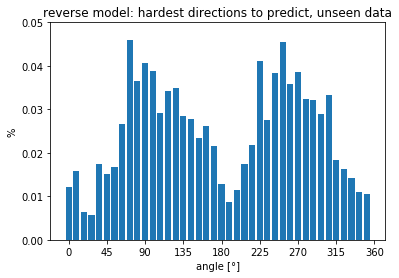

In [66]:
#HARDEST TO PREDICT
x_as = np.array(range(40))
plt.bar(x_as,avg_hardest_to_predict)
plt.title('reverse model: hardest directions to predict, unseen data')
plt.ylabel('%')
plt.ylim([0,0.05])
plt.xlabel('angle [°]')
plt.xticks([0,5,10,15,20,25,30,35,40], [ 0,45,90,135,180,225,270,315,360])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_hardest_dir'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show();

In [ ]:
#CONFUSION CORRESPONDING TO HARDEST DIRECTION
x_as = np.array(range(40))
plt.title(f'reverse model: confusion for hardest direction to predict ({hardest_direction*9}°), unseen data')
plt.ylabel('%')
plt.xlabel('angle [°]')
plt.xticks([0,5,10,15,20,25,30,35,40], [ 0,45,90,135,180,225,270,315,360])
plt.bar(x_as,avg_hardest_direction_confusion);

In [ ]:
#CONFUSION MATRIX
df_cm = pd.DataFrame(confusion_array, range(40), range(40))
norm_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
df_cm = norm_cm
plt.figure(figsize=(22,18),dpi=120)
sn.set(font_scale=2) # for label size
sn.heatmap(df_cm,vmin=0,vmax=1) # font size
plt.yticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30,32,34,36,38], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180,198,216,234,252,270,288,306,324,342])
plt.xlabel('predicted angle[°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30,32,34,36,38], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180,198,216,234,252,270,288,306,324,342])
plt.ylabel('actual angle[°]')
plt.title('reverse model: normalized confusion matrix',fontsize=40)
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_confusion'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show()
sn.set(font_scale=1)

In [ ]:
#CONFUSION MATRIX
df_cm = pd.DataFrame(tolerated_confusion_array, range(40), range(40))
norm_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
df_cm = norm_cm
plt.figure(figsize=(22,18),dpi=120)
sn.set(font_scale=2) # for label size
sn.heatmap(df_cm,vmin=0,vmax=1) # font size
plt.yticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30,32,34,36,38], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180,198,216,234,252,270,288,306,234,342])
plt.xlabel('predicted angle[°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30,32,34,36,38], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180,198,216,234,252,270,288,306,234,342])
plt.ylabel('actual angle[°]')
plt.title(f'reverse model: normalized confusion matrix with toleration of {tolerated_error_d}',fontsize=40)
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_confusion_tol'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show()
sn.set(font_scale=1)

label:
36
predicted:
7


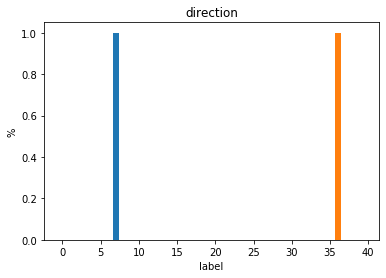

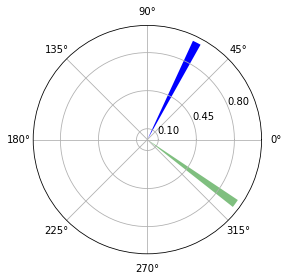

In [52]:
#RANDOMLY SELECT 1 INDEX AND COMPARE THE LABEL VS THE PREDICTION
index = randrange(0,X.shape[0])
label = y[index]
print("label:")
print(label)
print("predicted:")
print(np.argmax(predictions[index]))
#linear bar plot
plt.bar(np.arange(len(predictions[index,:])),predictions[index,:], align='center', alpha=1)
labels = np.zeros((40,))
labels[label] = np.amax(predictions[index])
plt.bar(np.arange(len(predictions[index,:])),labels[:], align='center', alpha=1)
plt.ylabel('%')
plt.xlabel('label')
plt.title('direction')
plt.show()

#polar bar plot
N = 40
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = np.pi / 40 
ax = plt.subplot(111, projection='polar')
ax.bar(theta, predictions[index,:], width=width, color='b', bottom=0.0, alpha=1)
ax.bar(theta, labels[:], width=width, color='g', bottom=0.0, alpha=0.5)
r_max = np.amax(predictions[index])
r = np.linspace(0.1*r_max, 0.8*r_max, 3)
r = np.round(r,2)
ax.set_rticks(r)
plt.tight_layout()
plt.show()

label: 16 	 predict: 24	 error: 8


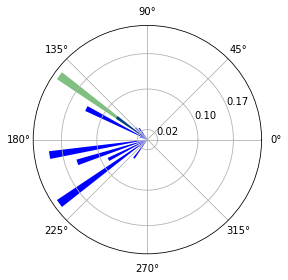

144_h_10_music-fma-0003.wav

label: 37 	 predict: 37
label: 22 	 predict: 22
label: 13 	 predict: 27	 error: 14


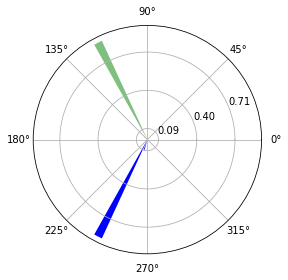

117_h_100_speech-librivox-0120.wav

label: 30 	 predict: 6	 error: 16


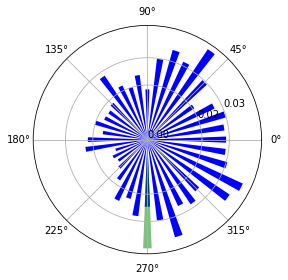

270_h_100_speech-us-gov-0141.wav

label: 25 	 predict: 25
label: 21 	 predict: 21
label: 22 	 predict: 22
label: 25 	 predict: 25
label: 6 	 predict: 6
label: 32 	 predict: 31	 error: 1
label: 19 	 predict: 19
label: 23 	 predict: 23
label: 9 	 predict: 19	 error: 10


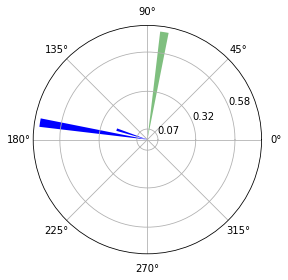

81_h_500_music-rfm-0129.wav

label: 25 	 predict: 25
label: 5 	 predict: 7	 error: 2
label: 2 	 predict: 2
label: 22 	 predict: 21	 error: 1
label: 9 	 predict: 3	 error: 6


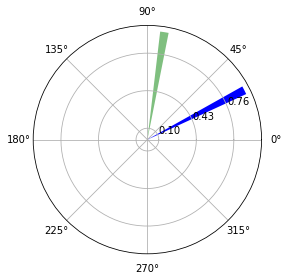

81_h_500_music-hd-0066.wav

label: 26 	 predict: 26
label: 28 	 predict: 15	 error: 13


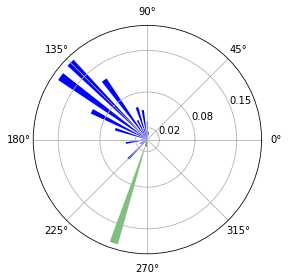

252_h_500_music-hd-0073.wav

label: 6 	 predict: 6
label: 39 	 predict: 0	 error: 1
label: 33 	 predict: 33
label: 15 	 predict: 16	 error: 1
label: 30 	 predict: 30
label: 5 	 predict: 5
label: 11 	 predict: 11
label: 3 	 predict: 3
label: 16 	 predict: 16
label: 11 	 predict: 11
label: 3 	 predict: 3
label: 18 	 predict: 23	 error: 5
label: 28 	 predict: 23	 error: 5
label: 21 	 predict: 25	 error: 4
label: 28 	 predict: 28
label: 3 	 predict: 3
label: 23 	 predict: 23
label: 10 	 predict: 25	 error: 15


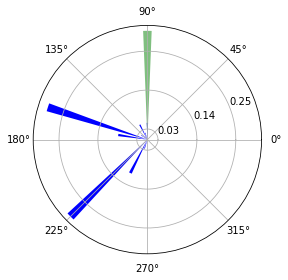

90_h_100_8635-295756-0011.wav

label: 36 	 predict: 31	 error: 5
label: 2 	 predict: 2
label: 34 	 predict: 34
label: 11 	 predict: 18	 error: 7


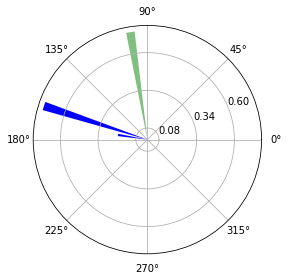

99_h_500_music-fma-0125.wav

label: 38 	 predict: 38
label: 3 	 predict: 7	 error: 4
label: 22 	 predict: 22
label: 12 	 predict: 27	 error: 15


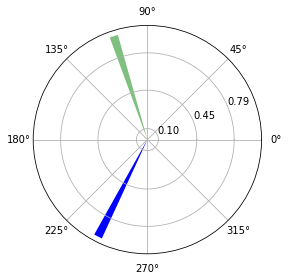

108_h_500_music-jamendo-0209.wav

label: 14 	 predict: 14
label: 38 	 predict: 38
label: 31 	 predict: 31
label: 15 	 predict: 23	 error: 8


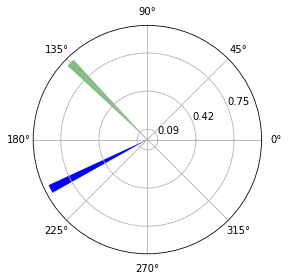

135_h_50_music-fma-0047.wav

label: 8 	 predict: 33	 error: 15


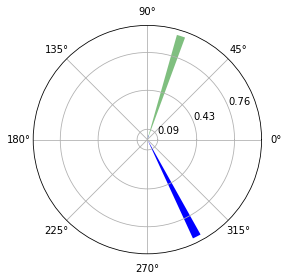

72_h_500_speech-librivox-0157.wav

label: 33 	 predict: 30	 error: 3
label: 8 	 predict: 32	 error: 16


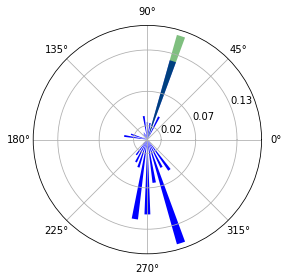

72_h_1000_music-jamendo-0175.wav

label: 17 	 predict: 22	 error: 5
label: 27 	 predict: 32	 error: 5
label: 29 	 predict: 11	 error: 18


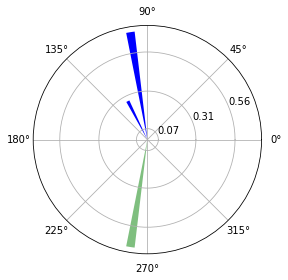

261_h_1000_music-jamendo-0176.wav

label: 39 	 predict: 0	 error: 1
label: 26 	 predict: 11	 error: 15


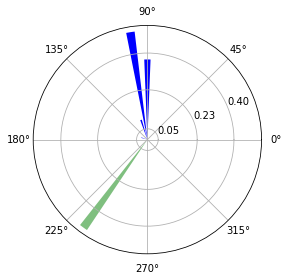

234_h_500_speech-us-gov-0105.wav

label: 25 	 predict: 23	 error: 2
label: 3 	 predict: 3
label: 13 	 predict: 13
label: 14 	 predict: 15	 error: 1
label: 3 	 predict: 21	 error: 18


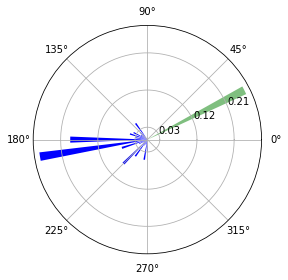

27_h_50_speech-librivox-0024.wav

label: 13 	 predict: 13
label: 14 	 predict: 14
label: 31 	 predict: 31
label: 13 	 predict: 28	 error: 15


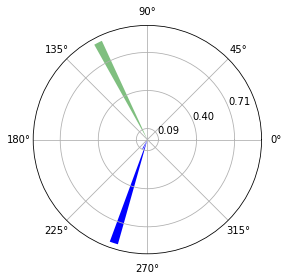

117_h_10_4039-184266-0030.wav

label: 4 	 predict: 4
label: 23 	 predict: 24	 error: 1
label: 12 	 predict: 28	 error: 16


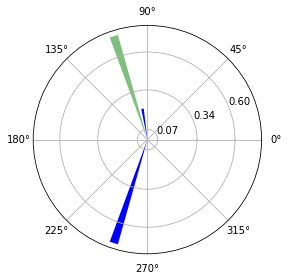

108_h_100_music-rfm-0119.wav

label: 35 	 predict: 36	 error: 1
label: 25 	 predict: 25
label: 13 	 predict: 13
label: 23 	 predict: 15	 error: 8


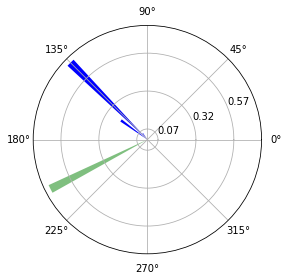

207_h_10_6574-70756-0002.wav

label: 2 	 predict: 2
label: 36 	 predict: 36
label: 14 	 predict: 15	 error: 1
label: 10 	 predict: 10
label: 7 	 predict: 32	 error: 15


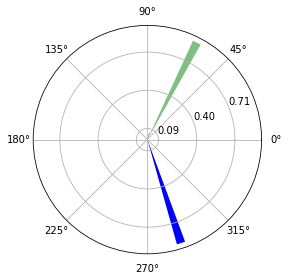

63_h_10_music-jamendo-0175.wav

label: 19 	 predict: 18	 error: 1
label: 0 	 predict: 0
label: 25 	 predict: 20	 error: 5
label: 9 	 predict: 13	 error: 4
label: 0 	 predict: 0
label: 21 	 predict: 6	 error: 15


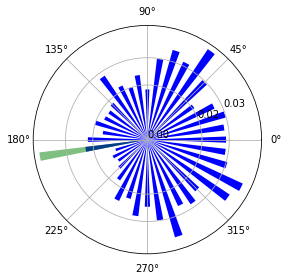

189_h_1000_speech-us-gov-0202.wav

label: 14 	 predict: 32	 error: 18


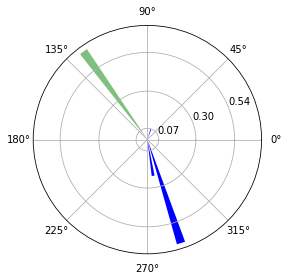

126_h_10_speech-us-gov-0138.wav

label: 17 	 predict: 17
label: 20 	 predict: 9	 error: 11


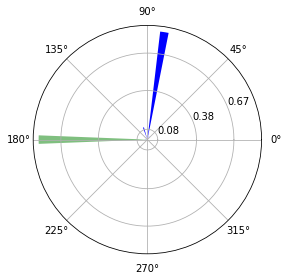

180_h_50_music-jamendo-0176.wav

label: 6 	 predict: 6
label: 35 	 predict: 36	 error: 1
label: 15 	 predict: 16	 error: 1
label: 27 	 predict: 27
label: 18 	 predict: 19	 error: 1
label: 19 	 predict: 19
label: 1 	 predict: 1
label: 20 	 predict: 25	 error: 5
label: 38 	 predict: 38
label: 14 	 predict: 18	 error: 4
label: 19 	 predict: 23	 error: 4
22 of 100 were off by more than 45°
average error is 7.0 or 63.0°
max error is 18 or 162°


In [60]:
#RANDOMLY SELECT A HUNDRED SAMPLES AND PLOT THOSE WHO ARE OF BY MORE THAN 45° AND SAVE THOSE
save_fig_location = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/misclassifications'
counter = 0
randomIndexes = random.sample(range(0,X.shape[0]),100)
allErrors = []
for index in randomIndexes:
    label = y[index]
    predicted = np.argmax(predictions[index])
    output = f'label: {label} \t predict: {predicted}'
    error = absolute_diff(predicted,label)
    error = absolute_diff(predicted,label)
    if error != 0:
        output += f'\t error: {error}'
        allErrors.append(error)
    print(output)
    if error >5:
        labels = np.zeros((40,))
        labels[label] = np.amax(predictions[index])
        ax = plt.subplot(111, projection='polar')
        ax.bar(theta, predictions[index,:], width=width, color='b', bottom=0.0, alpha=1)
        ax.bar(theta, labels[:], width=width, color='g', bottom=0.0, alpha=0.5)
        r_max = np.amax(predictions[index])
        r = np.linspace(0.1*r_max, 0.8*r_max, 3)
        r = np.round(r,2)
        ax.set_rticks(r)
        plt.tight_layout()
#         plt.savefig(f'{save_fig_location}/{fileNames.iloc[index]}.png')
        plt.show()
        print(fileNames.iloc[index])
        print()
        counter += 1
print(f'{counter} of {len(randomIndexes)} were off by more than 45°')
allErrors = np.array(allErrors)
m_mean = np.round(np.mean(allErrors))
m_max = np.amax(allErrors)
print(f'average error is {m_mean} or {m_mean*9}°')
print(f'max error is {m_max} or {m_max*9}°')

RANDOM TESTING

In [ ]:
#types of errors
#iterate direction per direction and see what types of errors occur
index = 0
while y[index] == 0:
    ax = plt.subplot(111, projection='polar')
    ax.bar(theta, predictions[index,:], width=width, color='b', bottom=0.0, alpha=1)
    plt.show()    
    index += 1

In [ ]:
dirrection = 90
df = pd.DataFrame(data)
sub_data = df.loc[df['label'] == dirrection]
sub_data.head()

In [ ]:
#making labels
labels_list = sub_data.iloc[:, -1]
# labels_list = reduce_Resolution(data)
encoder = LabelEncoder()
sub_y = encoder.fit_transform(labels_list)
print(sub_y)
print(sub_y.shape)

In [ ]:
# normalizing
scaler = StandardScaler()
sub_X = scaler.fit_transform(np.array(sub_data.iloc[:, :-1], dtype = float))

In [ ]:
#make prediction for each sample in X and evaluate entire model to get an idea of accuracy
sub_predictions = model.predict(X)

In [57]:
#randomly select a hundred samples and plot those who are of by more than 45° and save those
save_fig_location = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/reverse_Mel_scale/unseen'
counter = 0
randomIndexes = random.sample(range(0,sub_X.shape[0]),100)
allErrors = []
for index in randomIndexes:
    label = sub_y[index]
    predicted = np.argmax(sub_predictions[index])
    output = f'label: {label} \t predict: {predicted}'
    error = absolute_diff(predicted,label)
    error = absolute_diff(predicted,label)
    if error != 0:
        output += f'\t error: {error}'
        allErrors.append(error)
    print(output)
    if error >5:
        smart_pred = smart_prediction(predictions[index])
        output += f'\t smart_predict: {smart_pred}'
        smart_error = absolute_diff(smart_pred,label)
        output += f'\t smart_error: {smart_error}'
        print(output)
        labels = np.zeros((40,))
        labels[label] = np.amax(predictions[index])
        ax = plt.subplot(111, projection='polar')
        ax.bar(theta, predictions[index,:], width=width, color='b', bottom=0.0, alpha=1)
        ax.bar(theta, labels[:], width=width, color='g', bottom=0.0, alpha=0.5)
#         plt.savefig(f'{save_fig_location}/{fileNames.iloc[index]}.png')
        plt.show()
        print(fileNames.iloc[index])
        print()
        counter += 1
print(f'{counter} of {len(randomIndexes)} were off by more than 45°')
allErrors = np.array(allErrors)
m_mean = np.round(np.mean(allErrors))
m_max = np.amax(allErrors)
print(f'average error is {m_mean} or {m_mean*9}°')
print(f'max error is {m_max} or {m_max*9}°')

NameError: name 'sub_X' is not defined

In [ ]:
og_true = np.copy(y)
og_predictions = final_predictions
new_true = np.zeros(og_true.shape[0])
new_predictions = np.zeros(og_predictions.shape[0])
for i in range(og_predictions.shape[0]):
    if og_predictions[i] & 0x1: #odd
        new_predictions[i] = int(og_predictions[i]-1)
    else : #even
        new_predictions[i] = int(og_predictions[i])
    if og_true[i] & 0x1: #odd
        new_true[i] = int(og_true[i]-1)
    else : #even
        new_true[i] = int(og_true[i])

In [ ]:
red_confusion_array = confusion_matrix(new_true,new_predictions) #true,#predicted
red_confusion_array.shape

In [ ]:
#CONFUSION MATRIX
df_cm = pd.DataFrame(red_confusion_array, range(20), range(20))
norm_cm = df_cm.astype('float') / df_cm.sum(axis=1)[:, np.newaxis]
df_cm = norm_cm
plt.figure(figsize=(22,18),dpi=120)
sn.set(font_scale=2) # for label size
sn.heatmap(df_cm,vmin=0,vmax=1) # font size
plt.yticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18,], [ 0, 36, 72, 108, 144, 180,216,252,288,324])
plt.xlabel('predicted angle[°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18,], [ 0, 36, 72, 108, 144, 180,216,252,288,324])
plt.ylabel('actual angle[°]')
plt.title(f'reverse model: normalized confusion matrix ',fontsize=40)
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_confusion_reduced'
plt.savefig(f'{save_fig_file_path}.png')
plt.show()
sn.set(font_scale=1)

ALL MISCLASSIFICATIONS

In [ ]:
error_5 = 0
error_6 = 0
error_7 = 0
for i in range(len(indexes_of_misclassifications)):
    if 0 <= indexes_of_misclassifications[i] < L5:
        error_5 += 1
    elif L5 <= indexes_of_misclassifications[i] < L5 + L6:
        error_6 += 1
    elif L5 + L6 <= indexes_of_misclassifications[i] < L5 + L6 + L7:
        error_7 += 1
print('errors per dataset are..')
print(f'dataset5 has {error_5} total errors which is {int(100*error_5/L5)}% of this dataset')
print(f'dataset6 has {error_6} total errors which is {int(100*error_6/L6)}% of this dataset')
print()
print('overall picutre is ..')
print(f'dataset5 accounts for {int(100*error_5/len(indexes_of_misclassifications))}% of total errors')
print(f'dataset6 accounts for {int(100*error_6/len(indexes_of_misclassifications))}% of total errors')
print(f'dataset7 accounts for {int(100*error_7/len(indexes_of_misclassifications))}% of total errors')
print()
print('LATEX:')
print(f'dataset3 & speech & {error_5} & {int(100*error_5/L5)}\% & {int(100*error_5/len(indexes_of_misclassifications))}\% \\\\')
print(f'dataset4 & speech & {error_7} & {int(100*error_7/L7)}\% & {int(100*error_7/len(indexes_of_misclassifications))}\% \\\\')
print(f'dataset5 & music & {error_6} & {int(100*error_6/L6)}\% & {int(100*error_6/len(indexes_of_misclassifications))}\% \\\\')


GRAVE MISCLASSIFICATIONS <br>
i.e. error > 45°

In [ ]:
error_5_G = 0
error_6_G = 0
error_7_G = 0
for i in range(len(indexes_of_grave_misclassifications)):
    if 0 <= indexes_of_grave_misclassifications[i] < L5:
        error_5_G += 1
    elif L5 <= indexes_of_grave_misclassifications[i] < L5 + L6:
        error_6_G += 1
    elif L5 + L6 <= indexes_of_grave_misclassifications[i] < L5 + L6 + L7:
        error_7_G += 1
print('errors per dataset are..')
print(f'dataset5 has {error_5_G} total errors which is {int(100*error_5_G/L5)}% of this dataset')
print(f'dataset6 has {error_6_G} total errors which is {int(100*error_6_G/L6)}% of this dataset')
print(f'dataset7 has {error_7_G} total errors which is {int(100*error_7_G/L7)}% of this dataset')
print()
print('overall picutre is ..')
print(f'dataset5 accounts for {int(100*error_5_G/len(indexes_of_grave_misclassifications))}% of total errors')
print(f'dataset6 accounts for {int(100*error_6_G/len(indexes_of_grave_misclassifications))}% of total errors')
print(f'dataset7 accounts for {int(100*error_7_G/len(indexes_of_grave_misclassifications))}% of total errors')
print()
print('LATEX:')
print(f'dataset3 & speech & {error_5_G} & {int(100*error_5_G/L5)}\% & {int(100*error_5_G/len(indexes_of_grave_misclassifications))}\% & {int(100*error_5_G/len(indexes_of_misclassifications))}\% \\\\')
print(f'dataset4 & speech & {error_7_G} & {int(100*error_7_G/L7)}\% & {int(100*error_7_G/len(indexes_of_grave_misclassifications))}\% & {int(100*error_7_G/len(indexes_of_misclassifications))}\% \\\\')
print(f'dataset5 & music & {error_6_G} & {int(100*error_6_G/L6)}\% & {int(100*error_6_G/len(indexes_of_grave_misclassifications))}\% & {int(100*error_6_G/len(indexes_of_misclassifications))}\% \\\\')


ERROR PER DATASET

In [ ]:
x_as = np.array(range(21))
plt.bar(x_as,avg_errors_5)
plt.title('reverse model: average error occurrence on unseen data5')
plt.ylabel('%')
plt.ylim([0,1])
plt.xlabel('error [°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_errors5_error_unseen_data'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show();
error_27 = np.sum(avg_errors_5[0:3])
print(f'{int(error_27*100)}% of predictions are correct within 27°')
error_45 = np.sum(avg_errors_5[0:5])
print(f'{int(error_45*100)}% of predictions are correct within 45°')
error_90 = np.sum(avg_errors_5[0:10])
print(f'{int(error_90*100)}% of predictions are correct within 90°')

In [ ]:
x_as = np.array(range(21))
plt.bar(x_as,avg_errors_6)
plt.title('reverse model: average error occurrence on unseen data6')
plt.ylabel('%')
plt.ylim([0,1])
plt.xlabel('error [°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_errors6_error_unseen_data'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show();
error_27 = np.sum(avg_errors_6[0:3])
print(f'{int(error_27*100)}% of predictions are correct within 27°')
error_45 = np.sum(avg_errors_6[0:5])
print(f'{int(error_45*100)}% of predictions are correct within 45°')
error_90 = np.sum(avg_errors_6[0:10])
print(f'{int(error_90*100)}% of predictions are correct within 90°')

In [ ]:
x_as = np.array(range(21))
plt.bar(x_as,avg_errors_7)
plt.title('reverse model: average error occurrence on unseen data7')
plt.ylabel('%')
plt.ylim([0,1])
plt.xlabel('error [°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_model_errors5_error_unseen_data'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show();
error_27 = np.sum(avg_errors_7[0:3])
print(f'{int(error_27*100)}% of predictions are correct within 27°')
error_45 = np.sum(avg_errors_7[0:5])
print(f'{int(error_45*100)}% of predictions are correct within 45°')
error_90 = np.sum(avg_errors_7[0:10])
print(f'{int(error_90*100)}% of predictions are correct within 90°')

In [ ]:
df = pd.DataFrame({'dataset3':avg_errors_5, 'dataset4':avg_errors_6, 'dataset5':avg_errors_7})
df.plot(kind='bar', stacked=True)
plt.title('distribution of errors between datasets')
plt.ylabel('%')
# plt.ylim([0,0.5])
plt.xlabel('error [°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/error_distribtuion_between_datasets'
# plt.savefig(f'{save_fig_file_path}.png')

In [ ]:
x = np.array(range(21))
width = 0.25
ax = plt.subplots(111)
rects1 = ax.bar(x - width/3, avg_errors_5, width, label='avg_errors_5')
rects2 = ax.bar(x + width, avg_errors_6, width, label='avg_errors_6')
rects3 = ax.bar(x + width/3, avg_errors_7, width, label='avg_errors_7')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# ax.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180])
fig.tight_layout()

In [ ]:
x_as = np.array(range(21))
plt.bar(x_as,AVG_errors_7)
plt.title('reverse model: average error occurrence on unseen data')
plt.ylabel('%')
plt.ylim([0,1])
plt.xlabel('error [°]')
plt.xticks([ 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], [ 0, 18, 36, 54, 72, 90,  108, 126, 144, 162, 180])
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/rev_modeldumrror_unseen_data'
# plt.savefig(f'{save_fig_file_path}.png')
plt.show();

ATTEMPT TO PLOT RADAR CHART

In [ ]:
avg_correct = all_correct/sum_correct
x_as = np.array(range(40))

In [ ]:
avg_correct = all_correct/sum_correct
x_as = np.array(range(40))
N = 40
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=True)
width = np.pi / 40 

fig= plt.figure(dpi=120)
ax = fig.add_subplot(111, polar=True)
ax.plot(theta, avg_correct, '-', linewidth=2)
ax.fill(theta, avg_correct, alpha=0.25)
# ax.set_thetagrids(angles * 180/np.pi, labels)
plt.yticks([])
ax.set_title("distribution of correctly predicted directions", y=1.1)
ax.grid(True)
fig.tight_layout()
save_fig_file_path = 'D:/Users/MC/Documents/UNI/MASTER/thesis/SCRIPTURE_FIGURES/H6/correctness_distribution'
# plt.savefig(f'{save_fig_file_path}.png')

In [ ]:
x_as = np.array(range(40))
plt.bar(x_as,all_correct)
plt.show()
N = 40
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=True)
width = np.pi / 40 

fig= plt.figure(dpi=120)
ax = fig.add_subplot(111, polar=True)
ax.plot(theta, all_correct, '-', linewidth=2)
ax.fill(theta, all_correct, alpha=0.25)
# ax.set_thetagrids(angles * 180/np.pi, labels)
plt.yticks([])
ax.set_title("distribution of correctly predicted directions", y=1.1)
ax.grid(True)
fig.tight_layout()
plt.show

diagonal = np.diagonal(confusion_array)
fig= plt.figure(dpi=120)
ax = fig.add_subplot(111, polar=True)
ax.plot(theta, diagonal, '-', linewidth=2)
ax.fill(theta, diagonal, alpha=0.25)
# ax.set_thetagrids(angles * 180/np.pi, labels)
plt.yticks([])
ax.set_title("distribution of correctly predicted directions", y=1.1)
ax.grid(True)
fig.tight_layout()
diagonal-all_correct

WHAT FILES CAUSE ERRORS

In [ ]:
libri_error = 0
gov_error = 0
for i in range(len(indexes_of_misclassifications)):
    if 0 <= indexes_of_misclassifications[i] < L5:
        0+0
    elif L5 <= indexes_of_misclassifications[i] < L5 + L6:
        0+0
    elif L5 + L6 <= indexes_of_misclassifications[i] < L5 + L6 + L7:
        if 'us-gov' in misclassifications[i]:
            gov_error += 1
        else :
            libri_error +=1
print(f'total librispeech errors are {libri_error} which is {int(100*libri_error/L7)}\% of dataset4')
print(f'total us-gov errors are {gov_error} which is {int(100*gov_error/L7)}\% of dataset4')

WHAT IR LENGTHS CAUSE ERRORS

In [28]:
L_10_error = 0
L_50_error = 0
L_100_error = 0
L_500_error = 0
L_1000_error = 0
for i in range(len(indexes_of_misclassifications)):
    if 0 <= indexes_of_misclassifications[i] < L_10:
        L_10_error +=  1
    elif L_10 <= indexes_of_misclassifications[i] < L_10 + L_50:
        L_50_error +=  1
    elif L_10 + L_50 <= indexes_of_misclassifications[i] < L_10 + L_50 + L_100:
        L_100_error +=  1
    elif L_10 + L_50 + L_100 <= indexes_of_misclassifications[i] < L_10 + L_50 + L_100 + L_500:
        L_500_error +=  1
    elif L_10 + L_50 + L_100 + L_500 <= indexes_of_misclassifications[i] < L_10 + L_50 + L_100 + L_500 + L_1000:
        L_1000_error +=  1
print('LATEX:')
print(f'IR_10ms  & {L_10_error} & {int(100*L_10_error/L_10)}\% & {int(100*L_10_error/len(indexes_of_misclassifications))}\% \\\\')
print(f'IR_50ms  & {L_50_error} & {int(100*L_50_error/L_10)}\% & {int(100*L_50_error/len(indexes_of_misclassifications))}\% \\\\')
print(f'IR_100ms  & {L_100_error} & {int(100*L_100_error/L_10)}\% & {int(100*L_100_error/len(indexes_of_misclassifications))}\% \\\\')
print(f'IR_500ms  & {L_500_error} & {int(100*L_500_error/L_10)}\% & {int(100*L_500_error/len(indexes_of_misclassifications))}\% \\\\')
print(f'IR_1000ms  & {L_1000_error} & {int(100*L_1000_error/L_10)}\% & {int(100*L_1000_error/len(indexes_of_misclassifications))}\% \\\\')


LATEX:
IR_10ms  & 3146 & 48\% & 18\% \\
IR_50ms  & 3245 & 49\% & 19\% \\
IR_100ms  & 3481 & 53\% & 20\% \\
IR_500ms  & 3342 & 51\% & 20\% \\
IR_1000ms  & 3485 & 53\% & 20\% \\


In [ ]:
#DELETE US_GOV FILES
# df = pd.DataFrame(data)
# df = df[~df.filename.str.contains('us-gov')]
# data = df
# print('random selection of rows:')
# data_subset = data.sample(n=5)
# data_subset.head()

TESTS ON DIFF IR LENGTHS

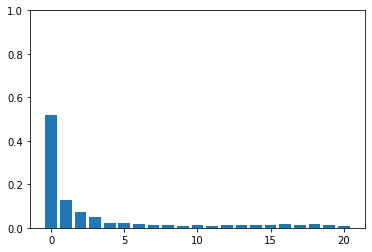

In [21]:
x_as = np.array(range(21))
plt.bar(x_as,avg_errors_10)
plt.ylim([0,1]);

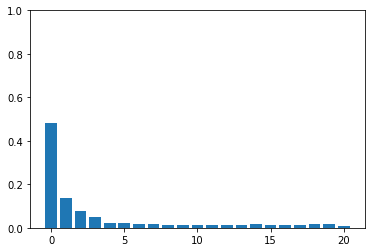

In [22]:
x_as = np.array(range(21))
plt.bar(x_as,avg_errors_50)
plt.ylim([0,1]);

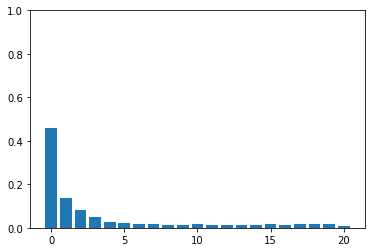

In [23]:
x_as = np.array(range(21))
plt.bar(x_as,avg_errors_100)
plt.ylim([0,1]);

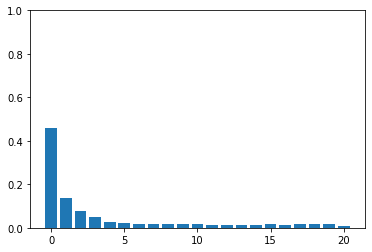

In [24]:
x_as = np.array(range(21))
plt.bar(x_as,avg_errors_500)
plt.ylim([0,1]);

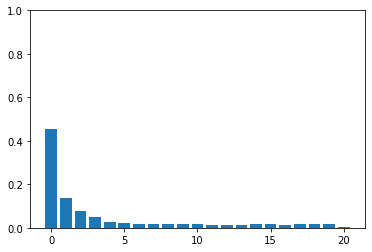

In [25]:
x_as = np.array(range(21))
plt.bar(x_as,avg_errors_1000)
plt.ylim([0,1]);